In [1]:
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
n=df['Age'].isnull().sum() # n= no of missing values in ae
n

177

In [5]:
df['Age'].dropna().sample() #It takes only one sample

874    28.0
Name: Age, dtype: float64

In [6]:
df['Age'].dropna().sample(n,random_state=0) # It takes the n samples 

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

# Inside Function What's Happening

In [8]:
df["Age_random"]=df['Age']#It will only copy the original data in New Feature
df.head(10)

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,NaN
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [9]:
##It will have the random sample to fill the nan values
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
random_sample

#It will have indexex of that valuees that the sample function choose as the random values.

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [10]:
##pandas need to have same index in order to merge the dataset
random_sample.index=df[df['Age'].isnull()].index# It will asign the nan values index to random_Sample_index.
random_sample

# Now It will have those indexs at where there is NAN value.

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [11]:
df.loc[df['Age'].isnull(),'Age_random']=random_sample # Now it will  compare the values of (AGE FEATURE and AGE_RANDOM) and fill the missing NAN values with random sample values
df.head(20)

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.00
1,1,38.0,71.2833,38.00
2,1,26.0,7.9250,26.00
3,1,35.0,53.1000,35.00
4,0,35.0,8.0500,35.00
5,0,NaN,8.4583,28.00
6,0,54.0,51.8625,54.00
7,0,2.0,21.0750,2.00
8,1,27.0,11.1333,27.00
9,1,14.0,30.0708,14.00


#  Compressed as function

In [12]:
def impute_nan(df,vaiable):

    df[variable+"_random"]=df[variable]#It will only copy the original data in New Feature
    
    ##It will have the random sample to fill the nan values
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index# It will asign the nan values index to random_Sample_index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample # It will asign the values of random_sample in the new feature age random

In [13]:
df.head(20)

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.00
1,1,38.0,71.2833,38.00
2,1,26.0,7.9250,26.00
3,1,35.0,53.1000,35.00
4,0,35.0,8.0500,35.00
5,0,NaN,8.4583,28.00
6,0,54.0,51.8625,54.00
7,0,2.0,21.0750,2.00
8,1,27.0,11.1333,27.00
9,1,14.0,30.0708,14.00


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'AGE VS AGE_RANDOM ')

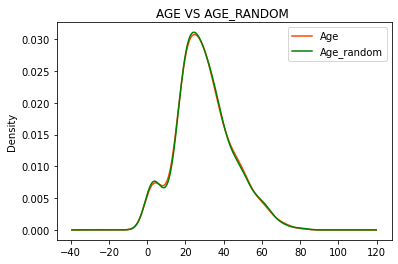

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',color='orangered', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("AGE VS AGE_RANDOM ")

### Advantages
1. Easy To implement
2. There is less distortion in variance

### Disadvantage
1. Every situation randomness wont work